# **Pure $\lambda$-Calculus**

[The deatailed script](https://www.mathcha.io/editor/Pvvz5UZ1t7ktL6sZJYp19sZnX9vVserJMEKhJvvMx7)

## **Variables**

The code below models variables.

Using the `natgen()` generator in this code ensures that a fresh variable is returned in response to each constructor call.

## Import dependencies

In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append('../')
from calculus.term import *
from calculus.strategy import *
from calculus.generation import gen_filtered_lambda_terms

from calculus_utils.drawing import *
from calculus_utils.algorithms import *

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
UPLIMIT = 60
DOWNLIMIT = 50
LAMBDA_TERM_COUNT = 100
RANDOM_AVERAGE_COUNT = 20

terms, stepsLO = gen_filtered_lambda_terms(
    count_terms=LAMBDA_TERM_COUNT, down_vertices_limit=DOWNLIMIT,
    up_vertices_limit=UPLIMIT)

countVertices = list(map(lambda term: term.verticesNumber, terms))
countRedexes = list(map(lambda term: len(term.redexes), terms))

print(f"number of lambda terms {len(terms)}")
print("number of vertices= {}".format(countVertices))
print("number of redexes= {}".format(countRedexes))

print("number of steps to normalize using LO strategy= {}".format(stepsLO))
print(f'number of terms with normal form {len(terms)}')

print("number of steps to normalize using LO strategy= {}".format(stepsLO))

stepsRI = [term.normalize(RightmostInnermostStrategy())[1] for term in terms]
print("number of steps to normalize using RI strategy= {}".format(stepsRI))

stepsRand = [sum([term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for
             term in terms]
print("number of steps to normalize using Random strategy= {}".format(stepsRand))

Generated terms: 225
LO strategy applying
Remove unormalized terms
Left 100 normalizeble terms
number of lambda terms 100
number of vertices= [53, 53, 58, 55, 51, 53, 57, 54, 55, 57, 58, 56, 51, 54, 56, 54, 58, 51, 52, 55, 55, 55, 57, 53, 54, 55, 52, 59, 58, 53, 51, 52, 53, 53, 55, 57, 52, 56, 59, 53, 54, 59, 53, 56, 51, 55, 57, 52, 59, 52, 58, 52, 51, 51, 59, 53, 58, 52, 59, 51, 51, 59, 56, 52, 59, 56, 53, 58, 51, 55, 57, 54, 51, 54, 58, 58, 51, 56, 57, 57, 57, 56, 58, 56, 54, 56, 58, 56, 58, 59, 58, 59, 51, 56, 58, 54, 57, 53, 52, 51]
number of redexes= [8, 3, 6, 7, 7, 6, 6, 4, 7, 3, 5, 6, 4, 5, 2, 5, 4, 4, 7, 4, 6, 3, 4, 6, 6, 4, 8, 7, 4, 5, 5, 6, 4, 6, 6, 5, 7, 5, 7, 5, 6, 7, 5, 1, 3, 3, 3, 7, 5, 5, 8, 6, 4, 4, 5, 7, 7, 7, 7, 5, 6, 7, 5, 8, 7, 4, 5, 3, 6, 8, 4, 6, 4, 6, 6, 5, 7, 4, 3, 4, 7, 10, 5, 5, 6, 8, 5, 5, 7, 5, 4, 5, 5, 8, 7, 5, 3, 6, 7, 6]
number of steps to normalize using LO strategy= [4, 3, 16, 1, 1, 4, 23, 4, 31, 5, 26, 5, 5, 5, 1, 8, 12, 3, 5, 4, 7, 3, 3, 23, 7, 2, 7, 

In [3]:
print('max cound LO: {}'.format(max(stepsLO)))
print('max cound RI: {}'.format(max(stepsRI)))
print('max cound Rand: {}'.format(max(stepsRand)))

max cound LO: 69
max cound RI: inf
max cound Rand: 161.9


In [4]:
max_count_steps_rlenv = 150
strategies_env = [LeftmostOutermostStrategy(),
                  RightmostInnermostStrategy()]

explore_ep = 10  # total 10 * 2 (strat) = 20
epsilon = .1

In [5]:
lambda_env = LambdaEnv(strategies=strategies_env,
                       lambda_terms=terms,
                       max_step_term=max_count_steps_rlenv,
                       count_terms=LAMBDA_TERM_COUNT)

lambda_env, rewards_greedy = run_greedy_policy(lambda_env,
                                               exploration=explore_ep,
                                               max_term_reward=max_count_steps_rlenv)

In [6]:
lambda_env = LambdaEnv(strategies=strategies_env,
                       lambda_terms=terms,
                       max_step_term=max_count_steps_rlenv,
                       count_terms=LAMBDA_TERM_COUNT)

lambda_env, rewards_e_greedy = run_e_greedy_policy(lambda_env,
                                                   exploration=explore_ep,
                                                   max_term_reward=max_count_steps_rlenv,
                                                   epsilon=epsilon)

In [7]:
rewards_greedy = [max_count_steps_rlenv - rew for rew in rewards_greedy]
rewards_e_greedy = [max_count_steps_rlenv - rew for rew in rewards_e_greedy]

In [8]:
print("number of steps to normalize using Greedy policy = {}".format(rewards_greedy))
print("number of steps to normalize using e-Greedy policy = {}".format(rewards_e_greedy))

number of steps to normalize using Greedy policy = [4, 6, 9, 150, 2, 150, 2, 17, 4, 10, 38, 23, 150, 14, 18, 11, 6, 150, 150, 40, 2, 5, 4, 22, 2, 12, 150, 8, 4, 150, 7, 2, 9, 17, 11, 6, 5, 6, 4, 3, 2, 14, 22, 3, 7, 20, 3, 3, 8, 5, 6, 3, 4, 9, 8, 3, 3, 5, 6, 20, 150, 150, 32, 6, 2, 15, 3, 4, 4, 5, 9, 2, 12, 10, 150, 4, 15, 18, 8, 17, 9, 6, 150, 3, 5, 7, 3, 3, 17, 4, 2, 4, 150, 10, 5, 7, 2, 11, 13, 30]
number of steps to normalize using e-Greedy policy = [6, 5, 8, 8, 6, 4, 3, 8, 4, 15, 10, 5, 5, 8, 3, 6, 150, 13, 6, 7, 150, 9, 13, 6, 10, 11, 14, 7, 4, 17, 6, 150, 12, 14, 13, 150, 5, 13, 12, 14, 8, 6, 7, 23, 7, 11, 5, 10, 11, 13, 24, 11, 5, 8, 8, 150, 25, 5, 6, 7, 8, 22, 4, 6, 11, 10, 6, 9, 8, 6, 14, 5, 15, 4, 150, 18, 7, 36, 12, 6, 8, 12, 16, 150, 12, 10, 7, 11, 16, 150, 8, 16, 12, 12, 16, 12, 6, 25, 10, 7]


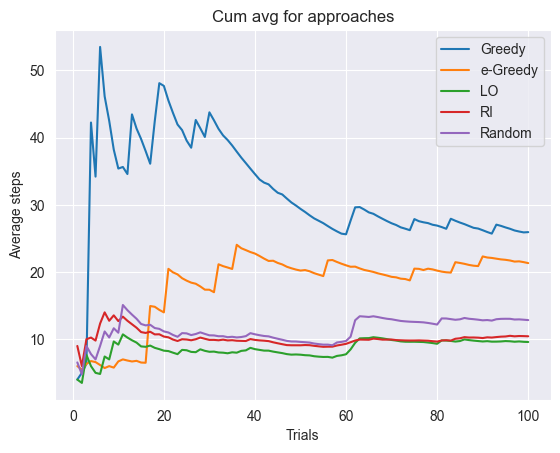

In [16]:
comp_data = {"Greedy": (rewards_greedy, "-"),
             "e-Greedy": (rewards_e_greedy, "-"),
             "LO": ([x if x != np.inf else np.max(stepsLO) for x in stepsLO], "-"),
             "RI": ([x if x != np.inf else 25 for x in stepsRI], "-"),
             "Random": (stepsRand, "-")}

draw_cumulative_avg_comparison(comp_data)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 22.13it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
gamma            0.016449  1210.917987 -857.449643     inf      0.182344   
exponpow         0.017341  1190.446758 -852.167616     inf      0.205546   
powerlaw         0.021237  1126.610666 -831.900881     inf      0.265305   
lognorm          0.022147  1380.296577 -827.704852     inf      0.391113   
chi2             0.030721  1095.606452 -794.983250     inf      0.469944   

             ks_pvalue  
gamma     2.210835e-03  
exponpow  3.500761e-04  
powerlaw  1.055930e-06  
lognorm   2.722922e-14  
chi2      8.884758e-21  
{'gamma': {'a': 0.3943341809180436, 'loc': 1.9999999999999998, 'scale': 64.51154364611378}}
Norm distribution: (25.94, 46.408796579958846)


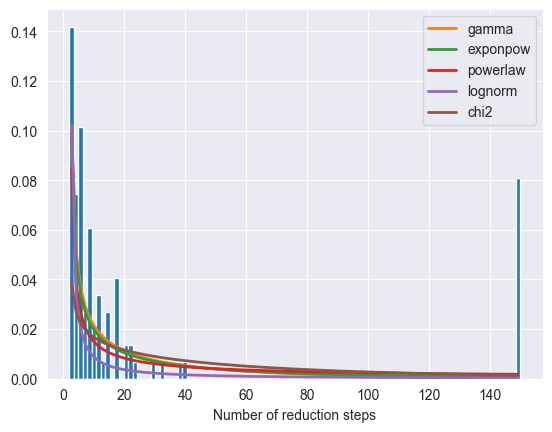

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 33.75it/s]

Log Norm distribution params: (2.260271975488302, 1.2522700131420246); expected value = 20.99663251414502


In [17]:
draw_hist(rewards_greedy)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.41it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.015386  1375.154644 -864.134331     inf      0.145048   
gamma            0.023104  1302.079901 -823.478613     inf      0.253021   
exponpow         0.025218  1237.172665 -814.720341     inf      0.307106   
chi2             0.027454  1187.705174 -806.225462     inf      0.303980   
powerlaw         0.030965  1122.058557 -794.190166     inf      0.346979   

             ks_pvalue  
lognorm   2.672106e-02  
gamma     3.950040e-06  
exponpow  7.175554e-09  
chi2      1.070968e-08  
powerlaw  2.917902e-11  
{'lognorm': {'s': 1.2090716585537558, 'loc': 2.7474355329544506, 'scale': 7.153784325973646}}
Norm distribution: (21.33, 38.32180971718325)


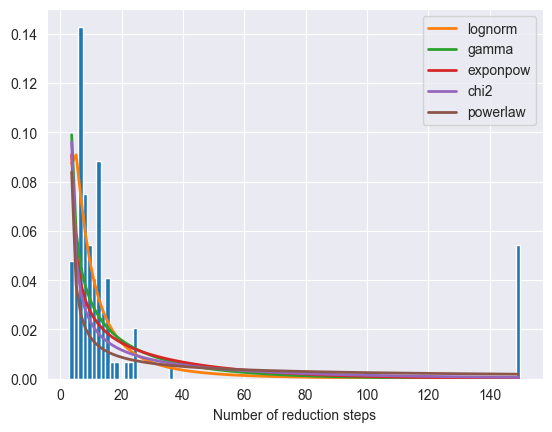

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 41.02it/s]

Log Norm distribution params: (2.4133675542050748, 0.9039931147176087); expected value = 16.809922380222268


In [18]:
draw_hist(rewards_e_greedy)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 26.05it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.061825  1144.191102 -725.047035     inf      0.115329   
exponpow         0.068198  1157.517384 -715.236135     inf      0.158690   
powerlaw         0.102509   875.856370 -674.481577     inf      0.443743   
rayleigh         0.103946  1423.647531 -677.694656     inf      0.269458   
norm             0.113138  1445.144405 -669.221701     inf      0.234552   

             ks_pvalue  
lognorm   1.292093e-01  
exponpow  1.148044e-02  
powerlaw  1.838371e-18  
rayleigh  6.659139e-07  
norm      2.536759e-05  
{'lognorm': {'s': 1.1187944330955193, 'loc': 0.41525908445023507, 'scale': 5.11515917221525}}
Norm distribution: (9.59, 11.591458061866073)


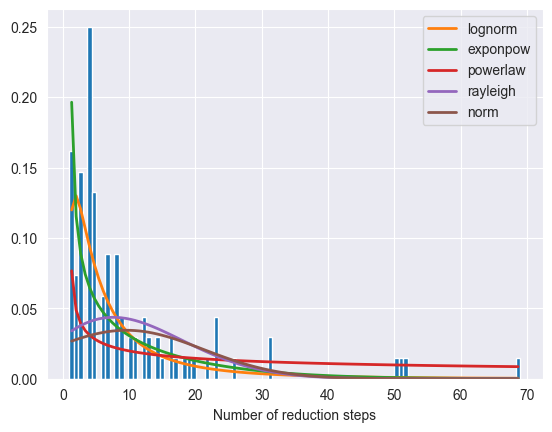

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 21.91it/s]

Log Norm distribution params: (1.7624809885858337, 0.988989809718174); expected value = 9.502276585241566


In [19]:
draw_hist(stepsLO)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 39.99it/s]


number of not normalized terms: 1
          sumsquare_error         aic         bic  kl_div  ks_statistic  \
chi2             0.559807  816.392891 -498.567669     inf      0.086975   
gamma            0.559807  816.390972 -498.567666     inf      0.086975   
exponpow         0.574224  794.874607 -496.050420     inf      0.122063   
rayleigh         0.576536  857.044326 -500.247614     inf      0.179789   
norm             0.591418  888.803310 -497.724623     inf      0.187412   

          ks_pvalue  
chi2       0.418507  
gamma      0.418506  
exponpow   0.096149  
rayleigh   0.002851  
norm       0.001618  
{'chi2': {'df': 3.4854539583720863, 'loc': 1.7241247573199048, 'scale': 2.4584448916371064}}
Norm distribution: (10.292929292929292, 6.296146849988227)


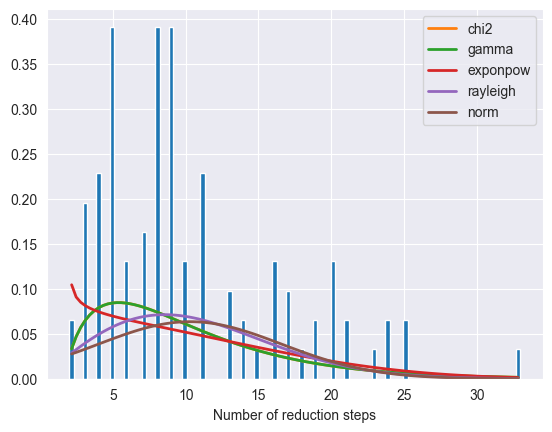

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 26.14it/s]

Log Norm distribution params: (2.1490461164614953, 0.6155384304615631); expected value = 10.365571648221449


In [20]:
draw_hist(stepsRI)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 32.12it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.001483  1577.576237 -1098.068660     inf      0.057912   
chi2             0.005340  1812.971344  -969.951805     inf      0.137846   
exponpow         0.015006  1165.222625  -866.633350     inf      0.369206   
powerlaw         0.017660  1128.238411  -850.349109     inf      0.365417   
rayleigh         0.019205  2588.642761  -846.566290     inf      0.303688   

             ks_pvalue  
lognorm   8.711779e-01  
chi2      4.047002e-02  
exponpow  9.787137e-13  
powerlaw  1.775565e-12  
rayleigh  1.111524e-08  
{'lognorm': {'s': 1.0133300510150223, 'loc': 1.1355450566872247, 'scale': 6.544621698934128}}
Norm distribution: (12.850500000000002, 19.4695794702916)


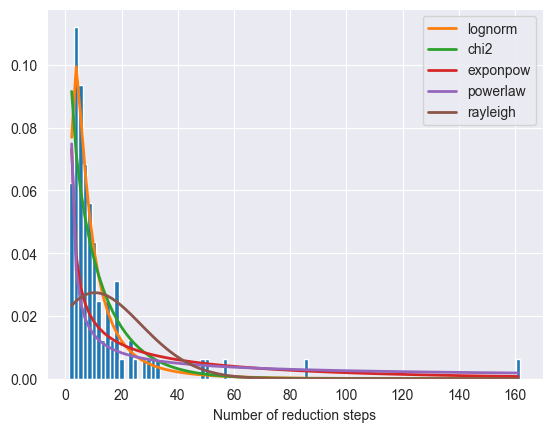

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 43.47it/s]

Log Norm distribution params: (2.102367218141077, 0.8412494199326418); expected value = 11.66062185006278


In [21]:
draw_hist(stepsRand)

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.13it/s]


expected number of steps to normalize using Mixed strategy= 9.7156308919561


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 45.22it/s]


expected number of steps to normalize using Mixed strategy= 10.71335799778852


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 46.86it/s]


expected number of steps to normalize using Mixed strategy= 11.31419116878779


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.85it/s]


expected number of steps to normalize using Mixed strategy= 10.78944638332498


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 43.05it/s]


expected number of steps to normalize using Mixed strategy= 11.156744585524693


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.47it/s]


expected number of steps to normalize using Mixed strategy= 10.288850937378387


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.99it/s]


expected number of steps to normalize using Mixed strategy= 9.800814062916418


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.85it/s]


expected number of steps to normalize using Mixed strategy= 10.771301386323172


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 45.91it/s]


expected number of steps to normalize using Mixed strategy= 10.242040140200505


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 46.86it/s]


expected number of steps to normalize using Mixed strategy= 11.730652755408919


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.15it/s]


expected number of steps to normalize using Mixed strategy= 10.576145092894743


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 46.14it/s]


expected number of steps to normalize using Mixed strategy= 10.820238602409287


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 45.44it/s]


expected number of steps to normalize using Mixed strategy= 10.213433571768572


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 46.38it/s]


expected number of steps to normalize using Mixed strategy= 10.462544407476866


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.70it/s]


expected number of steps to normalize using Mixed strategy= 10.334422368041363


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.14it/s]


expected number of steps to normalize using Mixed strategy= 9.746153437064308


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.79it/s]


expected number of steps to normalize using Mixed strategy= 9.61516728044748


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.16it/s]


expected number of steps to normalize using Mixed strategy= 9.526930354736244


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.71it/s]


expected number of steps to normalize using Mixed strategy= 9.735137087556375


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.85it/s]


expected number of steps to normalize using Mixed strategy= 10.5488311805778
gen	nevals	min    	avg    
0  	20    	9.52693	10.4051


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.35it/s]


expected number of steps to normalize using Mixed strategy= 9.65237524245314


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.95it/s]


expected number of steps to normalize using Mixed strategy= 10.32314055847144


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.50it/s]


expected number of steps to normalize using Mixed strategy= 9.694062224023876


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.55it/s]


expected number of steps to normalize using Mixed strategy= 10.13648764518293


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.81it/s]


expected number of steps to normalize using Mixed strategy= 10.452880162789592


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.12it/s]


expected number of steps to normalize using Mixed strategy= 9.74121354168785


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.28it/s]


expected number of steps to normalize using Mixed strategy= 10.503434571645311


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.13it/s]


expected number of steps to normalize using Mixed strategy= 9.641948815169366


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.42it/s]


expected number of steps to normalize using Mixed strategy= 9.73828104970476


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.77it/s]


expected number of steps to normalize using Mixed strategy= 9.609293677273612


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 44.65it/s]


expected number of steps to normalize using Mixed strategy= 10.212680294221958


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.03it/s]


expected number of steps to normalize using Mixed strategy= 10.048433984963975


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.18it/s]


expected number of steps to normalize using Mixed strategy= 10.108196221938272


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.64it/s]


expected number of steps to normalize using Mixed strategy= 9.704957107836105


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.56it/s]


expected number of steps to normalize using Mixed strategy= 9.61200763435145
1  	15    	9.52693	14.4036


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.15it/s]


expected number of steps to normalize using Mixed strategy= 9.804659087900335


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.16it/s]


expected number of steps to normalize using Mixed strategy= 9.707247737733933


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.42it/s]


expected number of steps to normalize using Mixed strategy= 9.6047790986393


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.86it/s]


expected number of steps to normalize using Mixed strategy= 9.606598720093325


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.75it/s]


expected number of steps to normalize using Mixed strategy= 9.739921012716723


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.38it/s]


expected number of steps to normalize using Mixed strategy= 9.583237060133923


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.71it/s]


expected number of steps to normalize using Mixed strategy= 10.088038303911246


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.12it/s]


expected number of steps to normalize using Mixed strategy= 9.647257586107667


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.35it/s]


expected number of steps to normalize using Mixed strategy= 11.153750826901998


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.52it/s]


expected number of steps to normalize using Mixed strategy= 9.57150574140954


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 22.95it/s]


expected number of steps to normalize using Mixed strategy= 9.54065864429995


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.16it/s]


expected number of steps to normalize using Mixed strategy= 9.592393286356563


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.72it/s]


expected number of steps to normalize using Mixed strategy= 9.602570990253893
2  	13    	9.52693	10.4417


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.72it/s]


expected number of steps to normalize using Mixed strategy= 9.517047499368186


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.89it/s]


expected number of steps to normalize using Mixed strategy= 9.60997829945011


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.30it/s]


expected number of steps to normalize using Mixed strategy= 9.60529210026283


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.41it/s]


expected number of steps to normalize using Mixed strategy= 9.715469616114472


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.77it/s]


expected number of steps to normalize using Mixed strategy= 9.633732340109207


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.35it/s]


expected number of steps to normalize using Mixed strategy= 9.637541226532376


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.12it/s]


expected number of steps to normalize using Mixed strategy= 9.600905313134346


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.42it/s]


expected number of steps to normalize using Mixed strategy= 9.591927139472725


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.59it/s]


expected number of steps to normalize using Mixed strategy= 9.603942496403723


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.00it/s]


expected number of steps to normalize using Mixed strategy= 9.536265053072317


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.35it/s]


expected number of steps to normalize using Mixed strategy= 9.531413242153413


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.51it/s]


expected number of steps to normalize using Mixed strategy= 9.562588761391101


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.79it/s]


expected number of steps to normalize using Mixed strategy= 9.540332726800203


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.01it/s]


expected number of steps to normalize using Mixed strategy= 9.835750258177445


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.43it/s]


expected number of steps to normalize using Mixed strategy= 9.534152335804812


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.86it/s]


expected number of steps to normalize using Mixed strategy= 9.58190895980758
3  	16    	9.51705	9.64359


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.72it/s]


expected number of steps to normalize using Mixed strategy= 9.54624039466655


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.60it/s]


expected number of steps to normalize using Mixed strategy= 9.312658991333612


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.47it/s]


expected number of steps to normalize using Mixed strategy= 9.58446933203335


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.86it/s]


expected number of steps to normalize using Mixed strategy= 9.570015366833207


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.03it/s]


expected number of steps to normalize using Mixed strategy= 9.581262537603443


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.65it/s]


expected number of steps to normalize using Mixed strategy= 9.632460429854577


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.01it/s]


expected number of steps to normalize using Mixed strategy= 9.694175264345912


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.49it/s]


expected number of steps to normalize using Mixed strategy= 9.59331232115762


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.29it/s]


expected number of steps to normalize using Mixed strategy= 9.549560249047795


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.94it/s]


expected number of steps to normalize using Mixed strategy= 9.535288532744246


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.94it/s]


expected number of steps to normalize using Mixed strategy= 9.672994494471745


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.34it/s]


expected number of steps to normalize using Mixed strategy= 9.57088835169736
4  	12    	9.31266	9.72402


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.43it/s]


expected number of steps to normalize using Mixed strategy= 9.51839242124265


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.52it/s]


expected number of steps to normalize using Mixed strategy= 9.53260325948123


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.43it/s]


expected number of steps to normalize using Mixed strategy= 9.517333341859622


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.98it/s]


expected number of steps to normalize using Mixed strategy= 9.573451217825145


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.42it/s]


expected number of steps to normalize using Mixed strategy= 9.54524978008094


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.39it/s]


expected number of steps to normalize using Mixed strategy= 9.54704996231929


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.93it/s]


expected number of steps to normalize using Mixed strategy= 9.54764284331903


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.19it/s]


expected number of steps to normalize using Mixed strategy= 9.534167735439556


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.03it/s]


expected number of steps to normalize using Mixed strategy= 9.57966787270964


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.18it/s]


expected number of steps to normalize using Mixed strategy= 9.537756606007907


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.60it/s]


expected number of steps to normalize using Mixed strategy= 9.586291534991851


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.06it/s]


expected number of steps to normalize using Mixed strategy= 9.5313994972544


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.32it/s]


expected number of steps to normalize using Mixed strategy= 9.594949402379937


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.08it/s]


expected number of steps to normalize using Mixed strategy= 9.590735210682773


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.50it/s]


expected number of steps to normalize using Mixed strategy= 9.538715388822935


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.72it/s]


expected number of steps to normalize using Mixed strategy= 9.586287064481928
5  	16    	9.31266	9.5742 


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.92it/s]


expected number of steps to normalize using Mixed strategy= 9.527026459621618


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.02it/s]


expected number of steps to normalize using Mixed strategy= 9.533933645139303


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 23.99it/s]


expected number of steps to normalize using Mixed strategy= 9.545898163706342


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.21it/s]


expected number of steps to normalize using Mixed strategy= 9.30864696805152


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.19it/s]


expected number of steps to normalize using Mixed strategy= 9.552453510550201


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.58it/s]


expected number of steps to normalize using Mixed strategy= 9.516650087723407


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.06it/s]


expected number of steps to normalize using Mixed strategy= 9.524200016465425


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.75it/s]


expected number of steps to normalize using Mixed strategy= 9.518412561725606


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.19it/s]


expected number of steps to normalize using Mixed strategy= 9.532377464669734


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.86it/s]


expected number of steps to normalize using Mixed strategy= 9.511279736055199


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.27it/s]


expected number of steps to normalize using Mixed strategy= 9.521402422003222


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.72it/s]


expected number of steps to normalize using Mixed strategy= 9.530733739606633


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.14it/s]


expected number of steps to normalize using Mixed strategy= 9.515946711855992


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.52it/s]


expected number of steps to normalize using Mixed strategy= 9.525966696494883


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.99it/s]


expected number of steps to normalize using Mixed strategy= 9.546312425465569


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.21it/s]


expected number of steps to normalize using Mixed strategy= 9.547110361557523
6  	16    	9.30865	11.1907


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.93it/s]


expected number of steps to normalize using Mixed strategy= 9.514637466086427


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.97it/s]


expected number of steps to normalize using Mixed strategy= 9.52482965284029


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.06it/s]


expected number of steps to normalize using Mixed strategy= 9.549001180033015


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.64it/s]


expected number of steps to normalize using Mixed strategy= 9.798402318155329


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.54it/s]


expected number of steps to normalize using Mixed strategy= 9.528196929164734


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.66it/s]


expected number of steps to normalize using Mixed strategy= 9.573544182516605


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.69it/s]


expected number of steps to normalize using Mixed strategy= 9.551348816850274


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.01it/s]


expected number of steps to normalize using Mixed strategy= 9.791323337979774


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.14it/s]


expected number of steps to normalize using Mixed strategy= 9.797874109622398


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.02it/s]


expected number of steps to normalize using Mixed strategy= 9.52663068629513


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.99it/s]


expected number of steps to normalize using Mixed strategy= 9.514573339996062


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.43it/s]


expected number of steps to normalize using Mixed strategy= 9.529279212626761


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.78it/s]


expected number of steps to normalize using Mixed strategy= 9.528659367900953
7  	13    	9.30865	10.9249
- Best solution is: 
p =  [0.8442766282608849, 0.005570775751607822, 0.0004811616660036969, 0.003498664313498083]


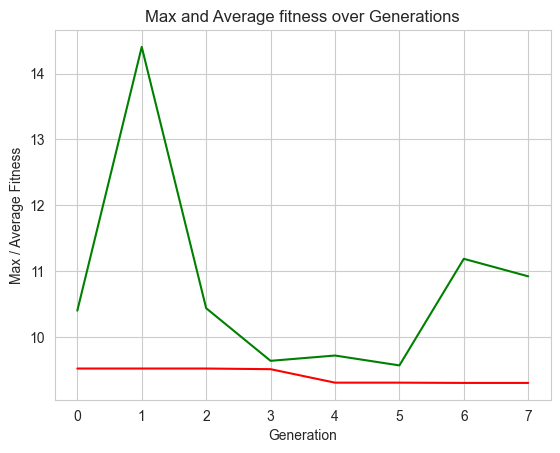

In [22]:
STRATEGIES = [LeftmostOutermostStrategy(), RightmostInnermostStrategy(), LeftmostInnermostStrategy(),
              RightmostOutermostStrategy(), RandomStrategy()]

BOUNDS_LOW = [0.1, 0.0, 0.0, 0.0]
BOUNDS_HIGH = [1.0, 1.0, 1.0, 1.0, ]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.3  # probability for mutating an individual
MAX_GENERATIONS = 7
HALL_OF_FAME_SIZE = 4
CROWDING_FACTOR = 10  # crowding factor for crossover and mutation

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# define the hyperparameter attributes individually:
for i in range(NUM_OF_PARAMS):
    # "hyperparameter_0", "hyperparameter_1", ...
    toolbox.register("hyperparameter_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i])

# create a tuple containing an attribute generator for each param searched:
hyperparameters = ()
for i in range(NUM_OF_PARAMS):
    hyperparameters = hyperparameters + (toolbox.__getattribute__("hyperparameter_" + str(i)),)


# create the individual operator to fill up an Individual instance:
def individual_creator() -> creator.Individual:
    indv = [0 for _ in range(NUM_OF_PARAMS)]
    for i in range(NUM_OF_PARAMS):
        indv[i] = random.uniform(BOUNDS_LOW[i], 1 - sum(indv))
    return creator.Individual(indv)


# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, individual_creator)


# fitness calculation
def fitness(individual):
    p = individual.copy()
    p.append(max(0, 1 - sum(individual)))
    steps = [sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in
                  range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for term in terms]
    steps = list(filter(lambda x: x != float('inf'), steps))

    distributions = get_common_distributions()
    distributions.remove('expon')
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma ** 2) / 2)
    print("expected number of steps to normalize using Mixed strategy= {}".format(result))
    if 1 - sum(individual) < 0:
        result += 100 * (sum(individual) - 1)
    return result,


toolbox.register("evaluate", fitness)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR,
                 indpb=1.0 / NUM_OF_PARAMS)

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = eaSimpleWithElitism(population,
                                          toolbox,
                                          cxpb=P_CROSSOVER,
                                          mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats,
                                          halloffame=hof,
                                          verbose=True)

# print best solution found:
print("- Best solution is: ")
print("p = ", hof.items[0])

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")
# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 32.91it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.043333  1166.854894 -760.585716     inf      0.099988   
exponpow         0.048099  1201.895279 -750.151841     inf      0.120526   
powerlaw         0.065991   925.505456 -718.524972     inf      0.335795   
rayleigh         0.078898  1477.970740 -705.266553     inf      0.261795   
norm             0.087382  1500.557371 -695.052769     inf      0.233937   

             ks_pvalue  
lognorm   2.528140e-01  
exponpow  1.006757e-01  
powerlaw  1.473054e-10  
rayleigh  1.549876e-06  
norm      2.691790e-05  
{'lognorm': {'s': 1.1324634074694115, 'loc': 0.5461206287337519, 'scale': 5.183473383178539}}
Norm distribution: (9.98, 12.158873303065544)


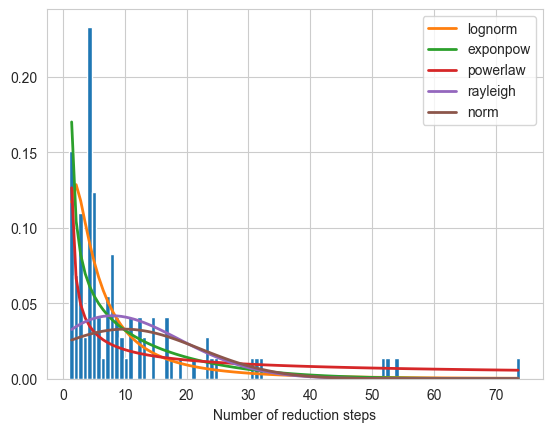

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.51it/s]

Log Norm distribution params: (1.8099478712248418, 0.9713022531183082); expected value = 9.792941829190017


In [23]:
p = hof.items[0]
p.append(max(0, 1 - sum(p)))
MixedStrategySteps = [
    sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT
    for term in terms]
draw_hist(MixedStrategySteps)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.98it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.058237  1148.858203 -731.024140     inf      0.113004   
exponpow         0.066980  1213.812463 -717.037268     inf      0.205117   
powerlaw         0.096525   880.631521 -680.497271     inf      0.438417   
rayleigh         0.098872  1433.770184 -682.699846     inf      0.265575   
norm             0.107932  1455.128249 -673.932208     inf      0.232376   

             ks_pvalue  
lognorm   1.439502e-01  
exponpow  3.629857e-04  
powerlaw  5.191114e-18  
rayleigh  1.025036e-06  
norm      3.127736e-05  
{'lognorm': {'s': 1.123337468871255, 'loc': 0.4508706826503097, 'scale': 5.106739644771572}}
Norm distribution: (9.656999999999998, 11.707770966328304)


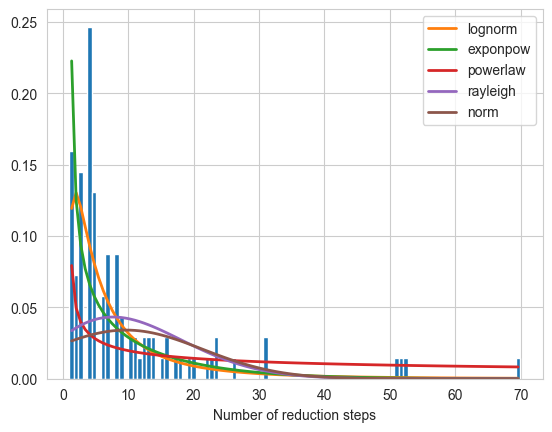

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 17.50it/s]

Log Norm distribution params: (1.7710807849917816, 0.9840732294745181); expected value = 9.537971630214537


In [24]:
p = [0.98, 0.005, 0.005, 0.005, 0.005]
steps = [
    sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT
    for term in terms]
draw_hist(steps)

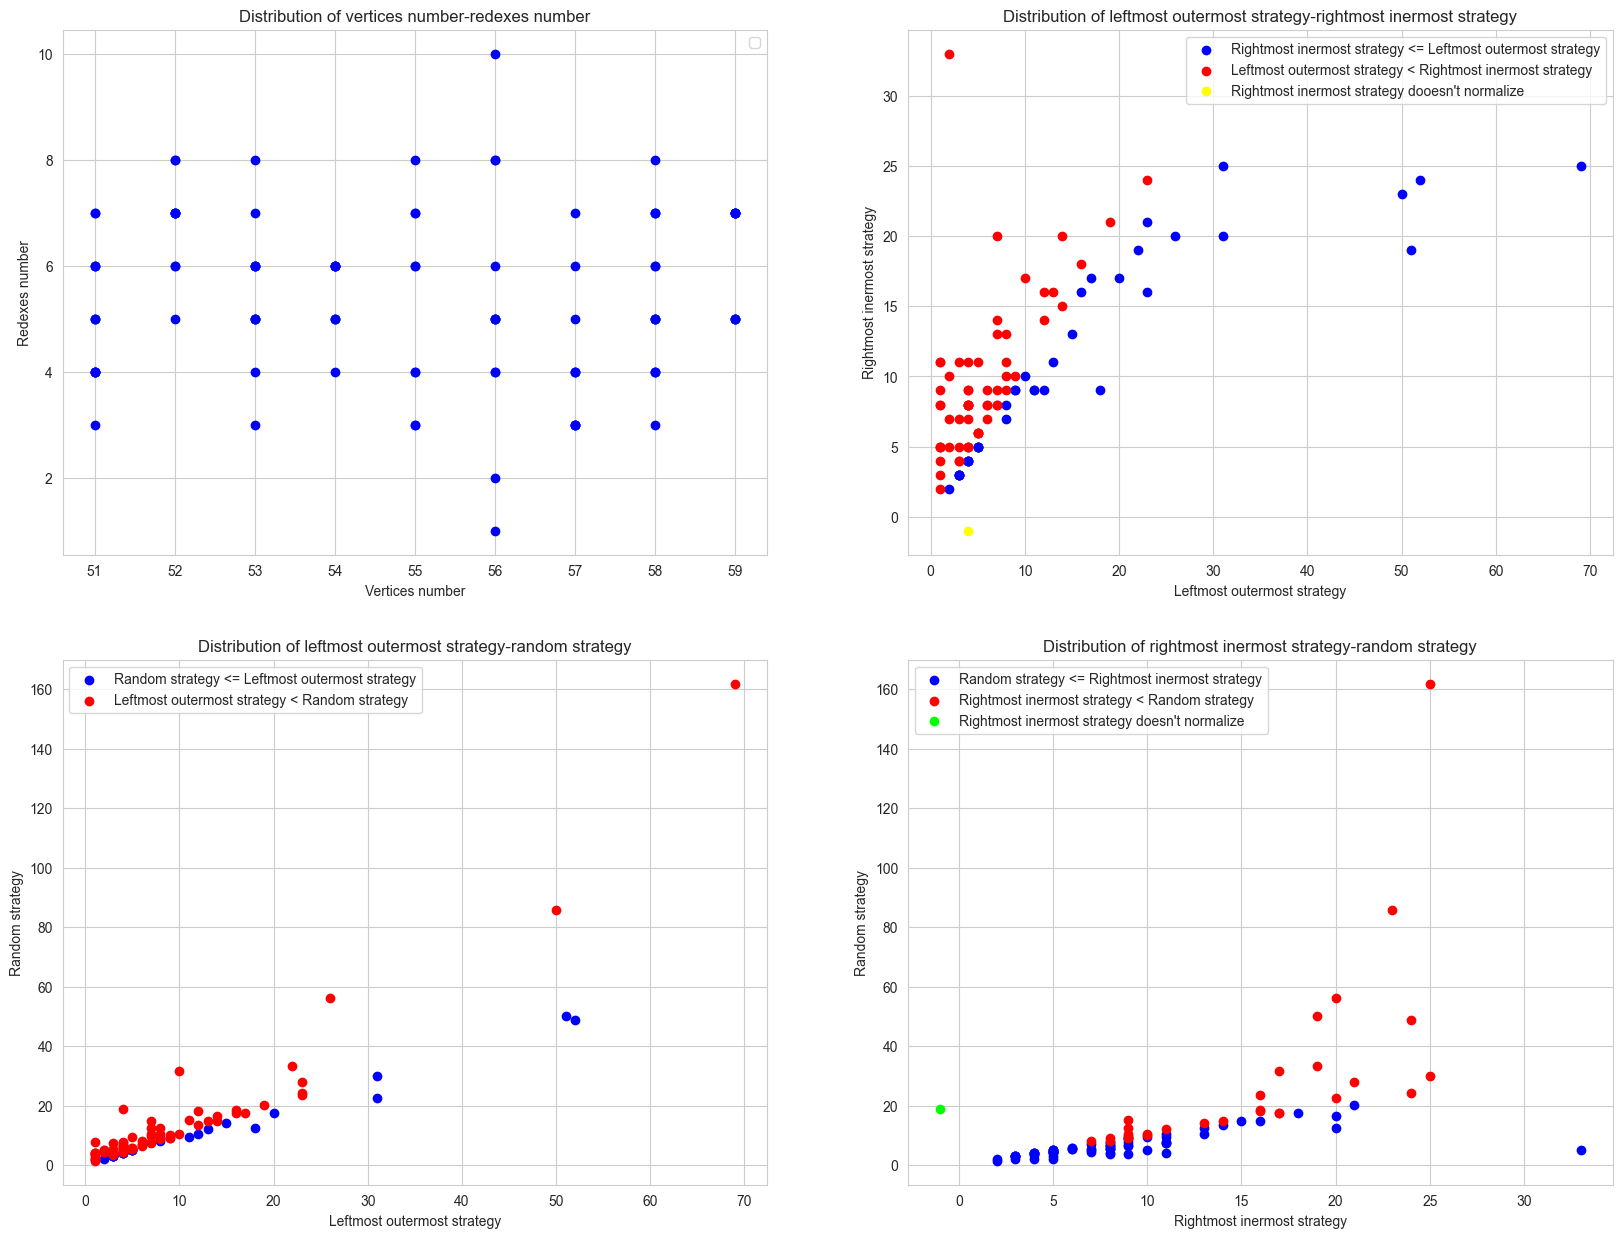

In [25]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax0, ax1, ax2, ax3 = axes.flatten()
draw_2d_distribution(ax0, countVertices, countRedexes, 'Vertices number', 'Redexes number')
draw_2d_strategy_distribution(ax1, stepsLO, stepsRI, 'Leftmost outermost strategy', 'Rightmost inermost strategy')
draw_2d_strategy_distribution(ax2, stepsLO, stepsRand, 'Leftmost outermost strategy', 'Random strategy')
draw_2d_strategy_distribution(ax3, stepsRI, stepsRand, 'Rightmost inermost strategy', 'Random strategy')
plt.show()

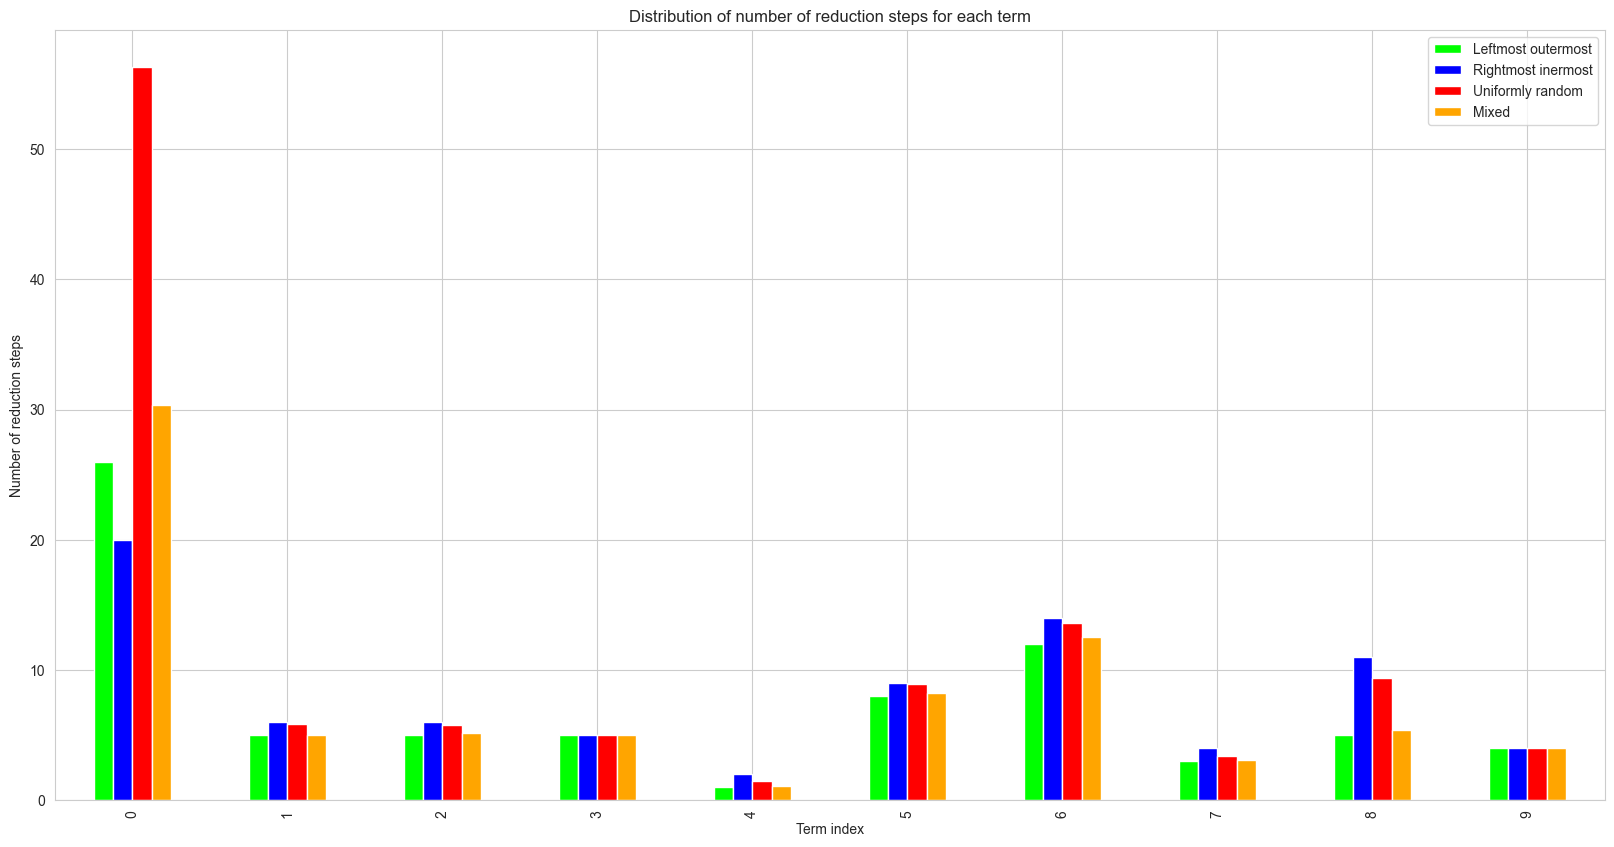

<AxesSubplot: title={'center': 'Distribution of number of reduction steps for each term'}, xlabel='Term index', ylabel='Number of reduction steps'>

In [26]:
colors = ['lime', 'blue', 'red', 'orange']
labels = ['Leftmost outermost', 'Rightmost inermost', 'Uniformly random', 'Mixed']
n = 20
draw_plot(stepsLO[10:n], stepsRI[10:n], stepsRand[10:n], MixedStrategySteps[10:n], labels, colors)

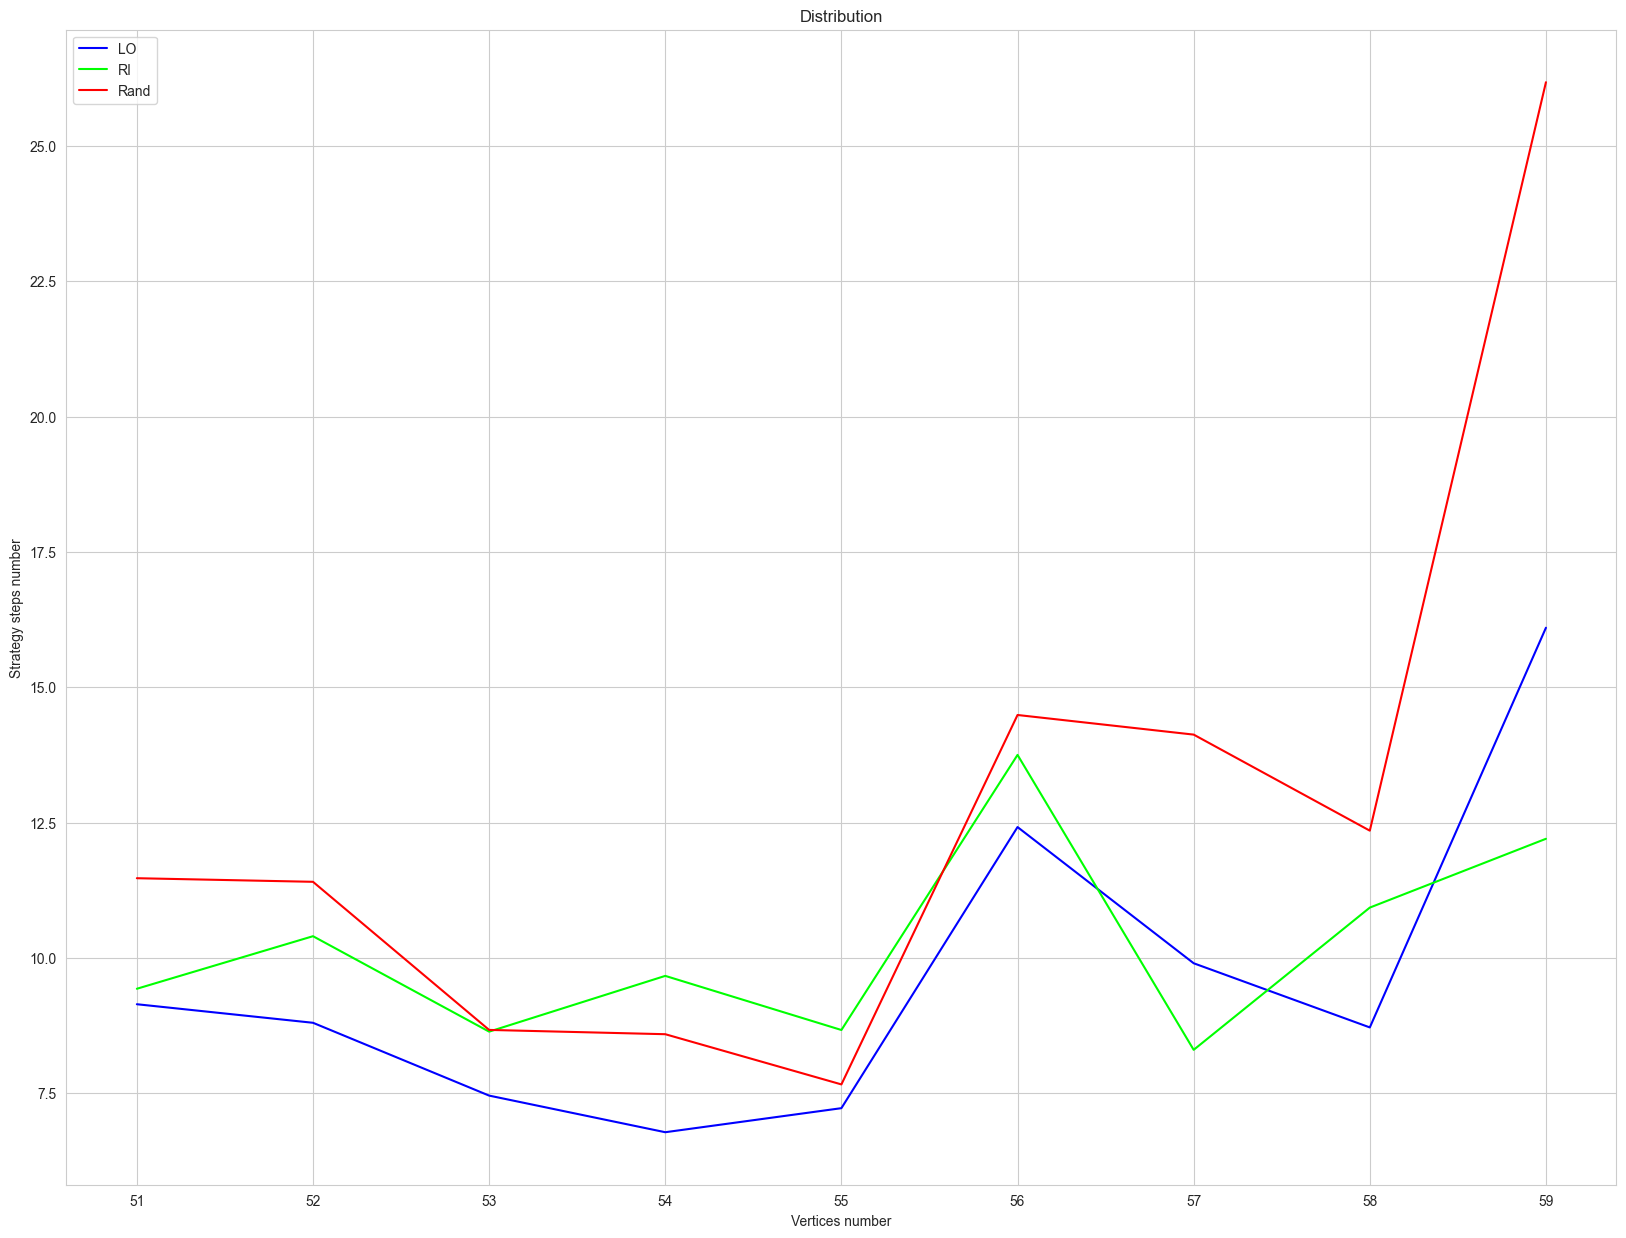

In [27]:
terms_dict = {i: [] for i in range(DOWNLIMIT, UPLIMIT)}

for i, term in enumerate(terms):
    terms_dict[term.verticesNumber].append((term, {'LO': stepsLO[i], 'RI': stepsRI[i], 'Rand': stepsRand[i]}))

average_term_data = dict()
for verticesNumber, data in terms_dict.items():
    data_without_inf = [d[1] for d in data if
                        d[1]['LO'] != float('inf') and d[1]['RI'] != float('inf') and d[1]['Rand'] != float('inf')]
    avgLO, avgRI, avgRand = 0, 0, 0
    for d in data_without_inf:
        avgLO += d['LO']
        avgRI += d['RI']
        avgRand += d['Rand']

    count = len(data_without_inf)
    if count != 0:
        average_term_data[verticesNumber] = {'LO': avgLO / count, 'RI': avgRI / count, 'Rand': avgRand / count}

plt.figure(figsize=(20, 15))
ax = plt.gca()
ax.plot(list(average_term_data.keys()), [data['LO'] for i, data in average_term_data.items()], color='blue', label='LO')
ax.plot(list(average_term_data.keys()), [data['RI'] for i, data in average_term_data.items()], color='lime', label='RI')
ax.plot(list(average_term_data.keys()), [data['Rand'] for i, data in average_term_data.items()], color='red',
        label='Rand')
ax.set(title='Distribution',
       xlabel='Vertices number',
       ylabel='Strategy steps number')
ax.legend(prop={'size': 10})

plt.show()

## TESTS

In [28]:
x, y, z = Var(), Var(), Var()
X, Z = Atom(x), Atom(z)
XXX = Application(Application(X, X), X)
XZ = Application(X, Z)
T = Application(Abstraction(x, XXX),
                Abstraction(x, Application(Abstraction(y, Z),
                                           XZ
                                           ))
                )

print(T)
for var, item in T._vars.items():
    print("\t{}".format(var), end=": ")
    print(item)

((fun v[5344281] => ((v[5344281] v[5344281]) v[5344281])) (fun v[5344281] => ((fun v[5344282] => v[5344283]) (v[5344281] v[5344283]))))
	v[5344281]: {'free': 0, 'bound': 4}
	v[5344283]: {'free': 2, 'bound': 0}


In [29]:
x, y, z, w, v = Var(), Var(), Var(), Var(), Var()
# (λx.(λy.( ((λz.(y z)) ((λw.w) x)) v )))
lambdaTerm = Abstraction(x,
                         Abstraction(y,
                                     Application(
                                         Application(
                                             Abstraction(z, Application(Atom(y), Atom(z))),
                                             Application(Abstraction(w, Atom(w)), Atom(w))),
                                         Atom(v))))


def testTerm():
    assert (len(lambdaTerm.redexes) == 2)
    assert (lambdaTerm.verticesNumber == 13)

    subterm = Application(Atom(y), Atom(z))
    assert (lambdaTerm.subterm(1) == lambdaTerm)
    assert (lambdaTerm.subterm(6) == subterm)
    assert (lambdaTerm.setSubterm(1, subterm) == subterm)

    assert (lambdaTerm._updateBoundVariables().verticesNumber == lambdaTerm.verticesNumber)
    assert (len(lambdaTerm._updateBoundVariables().redexes) == len(lambdaTerm.redexes))

    strategy = LeftmostOutermostStrategy()
    assert (len(lambdaTerm._betaConversion(strategy).redexes) == 1)
    assert (lambdaTerm._betaConversion(strategy).verticesNumber == 10)

    assert (len(lambdaTerm.normalize(strategy)[0].redexes) == 0)
    assert (lambdaTerm.normalize(strategy)[1] == 2)


def testStrategy():
    strategy = LeftmostOutermostStrategy()
    assert (strategy.redexIndex(lambdaTerm) == 4)


testTerm()
testStrategy()

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 26.75it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.061825  1144.191102 -725.047035     inf      0.115329   
exponpow         0.068198  1157.517384 -715.236135     inf      0.158690   
powerlaw         0.102509   875.856370 -674.481577     inf      0.443743   
rayleigh         0.103946  1423.647531 -677.694656     inf      0.269458   
norm             0.113138  1445.144405 -669.221701     inf      0.234552   

             ks_pvalue  
lognorm   1.292093e-01  
exponpow  1.148044e-02  
powerlaw  1.838371e-18  
rayleigh  6.659139e-07  
norm      2.536759e-05  
{'lognorm': {'s': 1.1187944330955193, 'loc': 0.41525908445023507, 'scale': 5.11515917221525}}
Norm distribution: (9.59, 11.591458061866073)


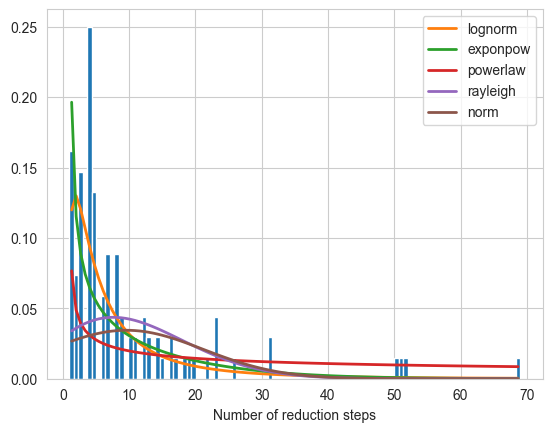

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 22.09it/s]

Log Norm distribution params: (1.7624809885858337, 0.988989809718174); expected value = 9.502276585241566


In [30]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 27.02it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.061825  1144.191102 -725.047035     inf      0.115329   
exponpow         0.068198  1157.517384 -715.236135     inf      0.158690   
powerlaw         0.102509   875.856370 -674.481577     inf      0.443743   
rayleigh         0.103946  1423.647531 -677.694656     inf      0.269458   
norm             0.113138  1445.144405 -669.221701     inf      0.234552   

             ks_pvalue  
lognorm   1.292093e-01  
exponpow  1.148044e-02  
powerlaw  1.838371e-18  
rayleigh  6.659139e-07  
norm      2.536759e-05  
{'lognorm': {'s': 1.1187944330955193, 'loc': 0.41525908445023507, 'scale': 5.11515917221525}}
Norm distribution: (9.59, 11.591458061866073)


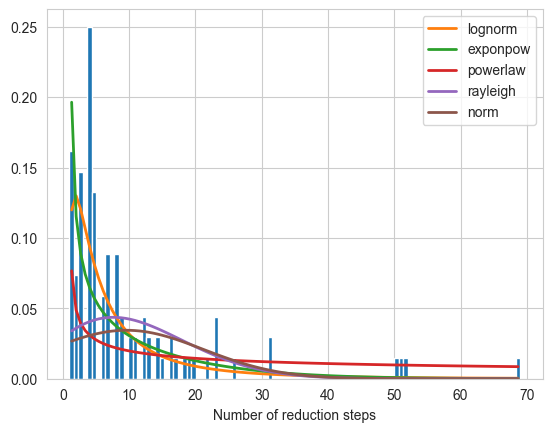

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 22.22it/s]

Log Norm distribution params: (1.7624809885858337, 0.988989809718174); expected value = 9.502276585241566


In [31]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)